## Import The Libraries 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

## Download The Data

In [2]:
data = pd.read_csv('Downloads\\flipkart\\flipkart.csv')
data

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
...,...,...,...,...
2299,2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2304 non-null   int64 
 1   Product_name  2304 non-null   object
 2   Review        2304 non-null   object
 3   Rating        2304 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 72.1+ KB


In [4]:
data.duplicated().sum()

0

In [5]:
data["Rating"].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [6]:
data = data.drop(columns = ["Unnamed: 0", "Product_name"])

## Clean The Data

In [7]:
data

,Review,Rating
0,Best under 60k Great performanceI got it for a...,5
1,Good perfomence...,5
2,Great performance but usually it has also that...,5
3,My wife is so happy and best product 👌🏻😘,5
4,"Light weight laptop with new amazing features,...",5
...,...,...
2299,"Great display, accurate colours at this price ...",5
2300,Superb monitor first brought 1 used for 2 mont...,5
2301,Awesome,5
2302,Only one issue with adapter,5


In [8]:
data['Rating'].value_counts()

5    1382
4     552
1     184
3     140
2      46
Name: Rating, dtype: int64

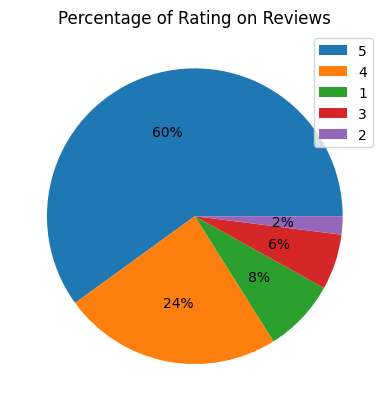

In [9]:
plt.pie(data['Rating'].value_counts(), autopct='%1.0f%%')
plt.title('Percentage of Rating on Reviews')
plt.legend(data['Rating'].value_counts().index)
plt.show()

In [10]:
nltk.download('stopwords')
def process_data(data):
    stop = stopwords.words('english')
    
    data2 = re.sub(r'^RT[\s]+', '', data)
    data2 = re.sub(r'\$\w*', '', data2)
    data2 = re.sub('<[^>]*>','',data2)
    data2 = re.sub(r'https?:\/\/.*[\r\n]*', '', data2)
    data2 = re.sub(r'\#', '', data2)
    data2 = re.sub(r'[0-9]', '', data2)
    
    emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',data2)
    text = re.sub('[\W]+',' ',data2.lower()) + ' '.join(emojis).replace('-','')
    
    tk = TweetTokenizer()
    stemmer = PorterStemmer()
    stemm_data = []
    
    tokens = tk.tokenize(text.lower())
    
    for word in tokens:
        if(word not in stop):
            if(word not in string.punctuation):
                temp = stemmer.stem(word)
                sumTemp = 0
                for let in temp:
                    sumTemp = ord(let) + sumTemp
                if(sumTemp > 256):
                    stemm_data.append(temp)               
                      
    return stemm_data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def clean_Data(data):   
    data2 = re.sub(r'^RT[\s]+', '', data)
    data2 = re.sub(r'\$\w*', '', data2)
    data2 = re.sub('<[^>]*>','',data2)
    data2 = re.sub(r'https?:\/\/.*[\r\n]*', '', data2)
    data2 = re.sub(r'\#', '', data2)
    data2 = re.sub(r'[0-9]', '', data2)
    
    emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',data2)
    text = re.sub('[\W]+',' ',data2.lower()) + ' '.join(emojis).replace('-','')
    
    stemmer = PorterStemmer()
    stop = stopwords.words('english')
    
    text = [word for word in text.split(' ') if word not in stop]
    text = " ".join(text)
    text = [word for word in text.split(' ') if word not in string.punctuation]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    
    return text

In [12]:
data['cleanData'] = data['Review'].apply(clean_Data)

In [13]:
data 

,Review,Rating,cleanData
0,Best under 60k Great performanceI got it for a...,5,best k great performancei got around batteri b...
1,Good perfomence...,5,good perfom
2,Great performance but usually it has also that...,5,great perform usual also game laptop issu batt...
3,My wife is so happy and best product 👌🏻😘,5,wife happi best product
4,"Light weight laptop with new amazing features,...",5,light weight laptop new amaz featur batteri li...
...,...,...,...
2299,"Great display, accurate colours at this price ...",5,great display accur colour price rang
2300,Superb monitor first brought 1 used for 2 mont...,5,superb monitor first brought use month bought ...
2301,Awesome,5,awesom
2302,Only one issue with adapter,5,one issu adapt


In [14]:
data['cleanData'][150]

'realli good laptop price k worth money boot time fast sec processor power th gener maximum batteri backup hour con ip display'

## Visualize The words

In [15]:
text = " ".join(word for word in data['cleanData'])
len(text)

273747

In [16]:
stop = stopwords.words('english')

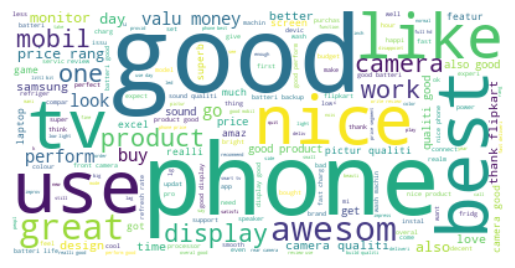

In [17]:
wc = WordCloud(stopwords=stop, background_color="white").generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
def make_Classify(rate):
    if (rate > 3):
        return 'Positive'
    elif (rate == 3):
        return 'Neutral'
    else:
        return 'Negative'

data['Classify'] = data['Rating'].apply(make_Classify)
data

,Review,Rating,cleanData,Classify
0,Best under 60k Great performanceI got it for a...,5,best k great performancei got around batteri b...,Positive
1,Good perfomence...,5,good perfom,Positive
2,Great performance but usually it has also that...,5,great perform usual also game laptop issu batt...,Positive
3,My wife is so happy and best product 👌🏻😘,5,wife happi best product,Positive
4,"Light weight laptop with new amazing features,...",5,light weight laptop new amaz featur batteri li...,Positive
...,...,...,...,...
2299,"Great display, accurate colours at this price ...",5,great display accur colour price rang,Positive
2300,Superb monitor first brought 1 used for 2 mont...,5,superb monitor first brought use month bought ...,Positive
2301,Awesome,5,awesom,Positive
2302,Only one issue with adapter,5,one issu adapt,Positive


In [19]:
pos = " ".join(str(word) for word in data['cleanData'].where(data['Classify'] == 'Positive'))
neg = " ".join(str(word) for word in data['cleanData'].where(data['Classify'] == 'Negative'))
neut = " ".join(str(word) for word in data['cleanData'].where(data['Classify'] == 'Neutral'))

#### Positive Words

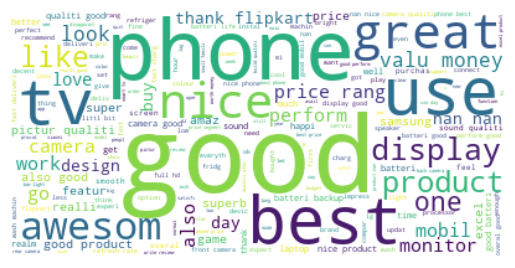

In [20]:
wc = WordCloud(stopwords=stop, background_color="white").generate(pos)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Negative Words

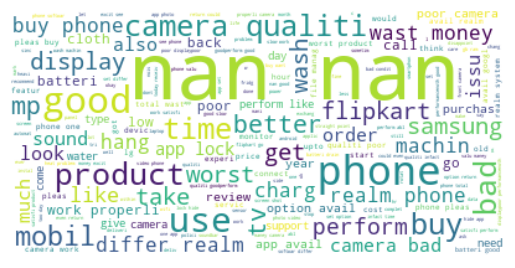

In [21]:
wc = WordCloud(stopwords=stop, background_color="white").generate(neg)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Neutral Words

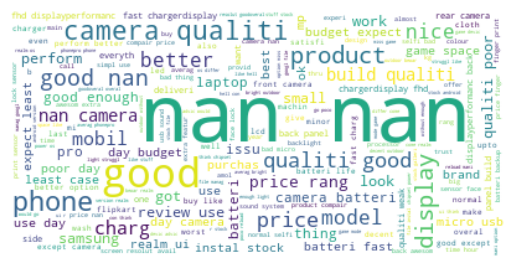

In [22]:
wc = WordCloud(stopwords=stop, background_color="white").generate(neut)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

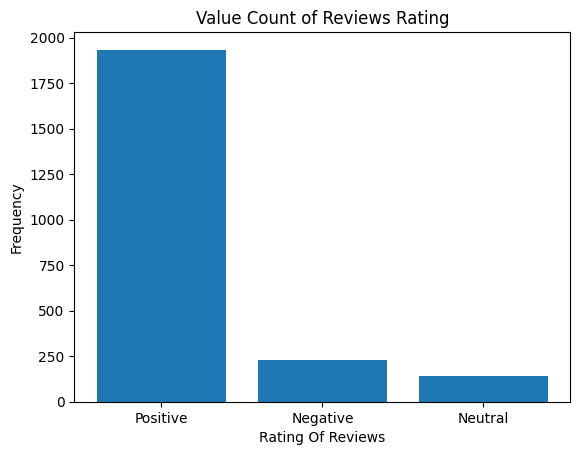

('Positive', 'Negative', 'Neutral')
[1934, 230, 140]


In [23]:
freqs = [data['cleanData'].where(data['Classify'] == 'Positive').count(),
         data['cleanData'].where(data['Classify'] == 'Negative').count(),
         data['cleanData'].where(data['Classify'] == 'Neutral').count()]

bars = ('Positive', 'Negative','Neutral')
pos = np.arange(len(bars))

plt.bar(pos, freqs)

plt.xticks(pos, bars)

plt.title('Value Count of Reviews Rating')

plt.xlabel('Rating Of Reviews')
plt.ylabel('Frequency')

plt.show()

print(bars)
print(freqs)

## Prepare The Data

In [24]:
x = data['cleanData']
y = data['Classify']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=104, test_size=0.25, shuffle=False)

In [51]:
x_train

0       best k great performancei got around batteri b...
1                                             good perfom
2       great perform usual also game laptop issu batt...
3                                 wife happi best product
4       light weight laptop new amaz featur batteri li...
                              ...                        
1723    good phone could better amol display ad fullhd...
1724    love phone respons featur would highlight face...
1725    mobil good overal design build nice feel good ...
1726    great phone smooth camera good better perform ...
1727    great item like product colour awsom batteri l...
Name: cleanData, Length: 1728, dtype: object

In [31]:
print(len(x_train))
print(len(x_test))

1728
576


In [49]:
def process_data(data):
    tk = TweetTokenizer()
    stemmer = PorterStemmer()
    stemm_data = []
    
    tokens = tk.tokenize(data.lower())
    
    for word in tokens:
        if(word not in stop):
            if(word not in string.punctuation):
                temp = stemmer.stem(word)
                sumTemp = 0
                for let in temp:
                    sumTemp = ord(let) + sumTemp
                if(sumTemp > 256):
                    stemm_data.append(temp)
    final = " ".join(stemm_data)                
                    
    return final

In [52]:
x_train2 = x_train.apply(process_data)

In [53]:
x_train2

0       best great performancei got around batteri bac...
1                                             good perfom
2       great perform usual also game laptop issu batt...
3                                 wife happi best product
4       light weight laptop new amaz featur batteri li...
                              ...                        
1723    good phone could better amol display fullhd lc...
1724    love phone respon featur would highlight face ...
1725    mobil good over design build nice feel good ho...
1726    great phone smooth camera good better perform ...
1727    great item like product colour awsom batteri l...
Name: cleanData, Length: 1728, dtype: object

## Vectorize The Data